# Final Exam Review - Part 1 - Solutions

The **final exam will be cumulative**, however the purpose of *this document* is to help review the material that was not covered in any of the lab assignments that is more applied.

To review for this *cumulative exam*, I would suggest reviewing:
* these practice problems (*I would strongly suggest working through these practice problems yourself before looking at the solutions*)
* the lab assignments
* the lecture notes
* previous exams

## <u>Case Study</u>: U.K. Smoker's Dataset

In this part 1 of our final exam review, let's return to our U.K. smoking dataset.

This dataset is comprised of a random sample of 421 smokers that live in the U.K.

The dataset contains information about the smokers including their:
* sex
* age
* marital status
* highest qualification
* nationality
* gross income
* region of the U.K. that live in.

The dataset also contains information about the habits of each of the smokers including:
* the amount of cigarettes that they smoke on the weekends
* the amount of cigarettes that they smoke on the weekdays
* the type of cigarettes that they smoke.

### Research Goals

In this analysis we have the following research goals.
1. <u>**Predictive Analytics**</u>: Build a classifier model that will be able to effectively classify whether or not a U.K. smoker smokes 'Packets' for **new datasets** (ie. not the observations in this dataset in which we know whether or not the person smokes packets).
2. <u>**Inferential Statistics**</u>: Use our selected logistic regression model to learn more about the relationship between whether or not a UK smoker smokes packets and various other demographic information.




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import t, norm, f

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression

## 1. Data Processing and Cleaning

First, let's load, clean, and transform our dataset.

### 1.1. Loading Data

Read the smoking.csv file into a dataframe.

In [2]:
df=pd.read_csv('smoking.csv')
df.head()

,sex,age,marital_status,highest_qualification,nationality,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Female,42,Single,No Qualification,British,"Under 2,600",The North,Yes,12,12,Packets
1,Male,53,Married,Degree,British,"Above 36,400",The North,Yes,6,6,Packets
2,Male,40,Single,GCSE/CSE,English,"2,600 to 5,200",The North,Yes,8,8,Hand-Rolled
3,Female,41,Married,No Qualification,English,"5,200 to 10,400",The North,Yes,15,12,Packets
4,Female,34,Married,GCSE/CSE,British,"2,600 to 5,200",The North,Yes,6,12,Packets


### 1.2. Missing Value Checking

Does this dataset contain any missing values?

First we check the data types of each of the variables.

In [3]:
df.dtypes

sex                      object
age                       int64
marital_status           object
highest_qualification    object
nationality              object
gross_income             object
region                   object
smoke                    object
amt_weekends              int64
amt_weekdays              int64
type                     object
dtype: object

It look slike all of the intended numerical variables are represented as an int64 (or float64). Thus all of the values in these columns are read as numerical values and not string values. This indicates that there are no string values in these numerical columns that are used to represent a missing value (other than these values which are automatically converted to NaN: #N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’.)
    
Let's inspect the categorical variables as well by looking at the unique values.

In [4]:
for col in ['sex', 'marital_status', 'highest_qualification', 'nationality', 'gross_income', 'region', 'smoke', 'type']:
    print('Unique values for the '+col+' column.')
    print(df[col].unique())
    print()

Unique values for the sex column.
['Female' 'Male']

Unique values for the marital_status column.
['Single' 'Married' 'Divorced' 'Widowed' 'Separated']

Unique values for the highest_qualification column.
['No Qualification' 'Degree' 'GCSE/CSE' 'GCSE/O Level' 'Other/Sub Degree'
 'A Levels' 'ONC/BTEC' 'Higher/Sub Degree']

Unique values for the nationality column.
['British' 'English' 'Welsh' 'Irish' 'Scottish' 'Other' 'Unknown'
 'Refused']

Unique values for the gross_income column.
['Under 2,600' 'Above 36,400' '2,600 to 5,200' '5,200 to 10,400' 'Refused'
 '15,600 to 20,800' '20,800 to 28,600' '10,400 to 15,600'
 '28,600 to 36,400' 'Unknown']

Unique values for the region column.
['The North' 'Midlands & East Anglia' 'London' 'South East' 'South West'
 'Wales' 'Scotland']

Unique values for the smoke column.
['Yes']

Unique values for the type column.
['Packets' 'Hand-Rolled' 'Both/Mainly Packets' 'Both/Mainly Hand-Rolled']



While we see that some of these categorical variables have a 'Unknown' value, we'd like to keep these values. Finally, let's check to make sure that there are no NaN values in all of our columns.

In [5]:
df.isna().sum()

sex                      0
age                      0
marital_status           0
highest_qualification    0
nationality              0
gross_income             0
region                   0
smoke                    0
amt_weekends             0
amt_weekdays             0
type                     0
dtype: int64

There are no NaN values in any of our columns. Thus, (as long as we don't consider 'Unknown' to be a 'missing value', this dataset does not contain any missing values.

### 1.3. Packets or Not Packets

Create a new variable y in your dataframe that is equal to a 1 if the type of cigarette smoked is 'Packets' and 0 otherwise.

In [6]:
df['y']=1*(df['type']=='Packets')
df.head()

,sex,age,marital_status,highest_qualification,nationality,gross_income,region,smoke,amt_weekends,amt_weekdays,type,y
0,Female,42,Single,No Qualification,British,"Under 2,600",The North,Yes,12,12,Packets,1
1,Male,53,Married,Degree,British,"Above 36,400",The North,Yes,6,6,Packets,1
2,Male,40,Single,GCSE/CSE,English,"2,600 to 5,200",The North,Yes,8,8,Hand-Rolled,0
3,Female,41,Married,No Qualification,English,"5,200 to 10,400",The North,Yes,15,12,Packets,1
4,Female,34,Married,GCSE/CSE,British,"2,600 to 5,200",The North,Yes,6,12,Packets,1


### 1.4. Training Data and Test Data

To help us predict how well our final classifier model will do in classifying packet and non-packet smokers for new datasets, we will randomly split up our dataset into a training dataset and test dataset. We will use our training dataset to train our classifier models, and our test dataset to test our classifier models.

Using a random state of 100, create a training dataset that is comprised of a random sample of 80% of the observations in our dataset and a test dataset that is comprised the remaining 20% of observations.


In [7]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, 
                                   test_size=0.20, 
                                   random_state=100)

In [8]:
df_train

,sex,age,marital_status,highest_qualification,nationality,gross_income,region,smoke,amt_weekends,amt_weekdays,type,y
332,Male,22,Single,GCSE/CSE,English,"20,800 to 28,600",South West,Yes,20,5,Packets,1
248,Female,22,Single,GCSE/CSE,English,"10,400 to 15,600",South East,Yes,15,7,Packets,1
407,Male,52,Single,GCSE/CSE,Irish,"15,600 to 20,800",Scotland,Yes,25,20,Both/Mainly Packets,0
184,Female,55,Married,No Qualification,English,"2,600 to 5,200",Midlands & East Anglia,Yes,1,0,Packets,1
69,Female,40,Divorced,GCSE/CSE,English,"10,400 to 15,600",The North,Yes,5,0,Packets,1
...,...,...,...,...,...,...,...,...,...,...,...,...
343,Female,34,Single,GCSE/O Level,English,"5,200 to 10,400",South West,Yes,20,20,Hand-Rolled,0
359,Female,52,Divorced,No Qualification,Welsh,"5,200 to 10,400",Wales,Yes,5,5,Packets,1
323,Male,42,Married,Higher/Sub Degree,English,"20,800 to 28,600",South West,Yes,12,0,Packets,1
280,Female,33,Single,Degree,English,"15,600 to 20,800",South East,Yes,10,6,Both/Mainly Packets,0


In [9]:
df_test

,sex,age,marital_status,highest_qualification,nationality,gross_income,region,smoke,amt_weekends,amt_weekdays,type,y
136,Female,44,Married,No Qualification,English,"10,400 to 15,600",Midlands & East Anglia,Yes,20,20,Packets,1
269,Female,48,Divorced,No Qualification,Irish,"2,600 to 5,200",South East,Yes,40,20,Packets,1
300,Female,18,Single,GCSE/O Level,English,"2,600 to 5,200",South East,Yes,25,25,Both/Mainly Hand-Rolled,0
152,Female,24,Single,GCSE/CSE,British,"10,400 to 15,600",Midlands & East Anglia,Yes,8,2,Packets,1
23,Female,22,Single,GCSE/CSE,English,"2,600 to 5,200",The North,Yes,20,20,Packets,1
...,...,...,...,...,...,...,...,...,...,...,...,...
158,Male,28,Single,GCSE/O Level,British,"5,200 to 10,400",Midlands & East Anglia,Yes,5,5,Both/Mainly Packets,0
5,Female,36,Married,GCSE/O Level,English,"5,200 to 10,400",The North,Yes,5,2,Packets,1
366,Female,27,Single,GCSE/O Level,Welsh,"5,200 to 10,400",Wales,Yes,5,5,Packets,1
121,Male,40,Married,GCSE/O Level,English,"5,200 to 10,400",Midlands & East Anglia,Yes,20,20,Both/Mainly Packets,0


## 2. <u>Full Model</u>

In this analysis, we would like to build a logistic regression model that can be used as a classifier model to predict whether or not a UK smoker smokes packets. Specifically, we would like to build and evaluate a series of logistic regression models that that predict the probability that a UK smoker smokes *packets*, using some subset (or all) of the following explanatory variables:
* age
* sex
* marital status
* the amount of cigarettes smoked on the weekends
* the amount of cigarettes smoked on the weekdays

To start, our **full model** will use all of these 5 explanatory variables.


### 2.1. Fitting the Full Logistic Regression Model

Fit this full logistic regression model **with the training dataset** and display the summary output table below.

In [10]:
full_mod=smf.logit('y~age+sex+marital_status+amt_weekends+amt_weekdays', data=df_train).fit()
full_mod.summary()

Optimization terminated successfully.
         Current function value: 0.573133
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  336
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            8
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                 0.06635
Time:                        15:53:22   Log-Likelihood:                -192.57
converged:                       True   LL-Null:                       -206.26
Covariance Type:            nonrobust   LLR p-value:                 0.0006105
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.5779      0.649      2.431      0.015       0.306       2.850
sex[T.Male]                    -0.7945      0.260     -3.050      0.002      -1.305      -0.284
marital_status[T.Married]       0.2933      0.410      0.716      0.474      -0.510       1.097
marital_status[T.Separated]    -0.2515      0.589     -0.427      0.670      -1.407       0.904
marital_status[T.Single]       -0.3539      0.432     -0.819      0.413      -1.201       0.493
marital_status[T.Widowed]       0.9625      0.657      1.464      0.143      -0.326       2.251
age                            -0.0005      0.011     -0.046      0.963      -0.023       0.022
amt_weekends                    0.0049      0.020      0.245      0.806      -0.034       0.044
amt_weekdays                   -0.0311      0.022     -1.435      0.151      -0.074       0.011
===============================================================================================
"""

### 2.2. Predictive Probabilities

Next, use this full logistic regression model to calculate the predictive probabilities for the observations in the **test dataset.**

In [11]:
df_test['phat_test'] = full_mod.predict(exog=df_test)
df_test['phat_test'].head() 

136    0.789812
269    0.755223
300    0.636268
152    0.766467
23     0.665562
Name: phat_test, dtype: float64

### 2.3. ROC and AUC

Finally, display the ROC curve and AUC score for this **full logistic regression model** and the **test dataset**.

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, score = roc_curve(y_true=df_test['y'], y_score=df_test['phat_test'])
auc = roc_auc_score(y_true=df_test['y'], y_score=df_test['phat_test'])

In [13]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

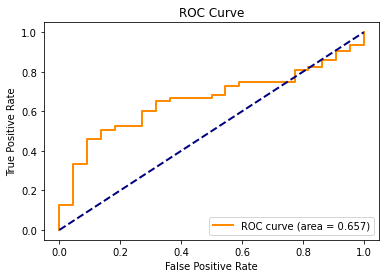

In [14]:
plot_roc(fpr, tpr, auc)

## 3. <u>Reduced Model 1</u> -  Found with Backwards Elimination

Is it possible that we may be overfitting our classifier model, by using ALL of the 5 explanatory variables that we used in the full model? Is it possible that there exists a reduced logistic regression model that will yield better classifications of the observations in our test dataset?

To help us answer these questions, let's use a backwards elimination algorithm with AIC score to help us find a sensible reduced model to compare to the full model.

### 3.1. Finding a Reduced Model with Backwards Elimination Algorithm
Starting with your full model, perform the backwards elimination algorithm, using AIC **with your training dataset**. Once your algorithm has finished, fit your final model (**also with the training dataset**) one more time, and display the summary output table.

### <u>Iteration 1 of Backwards Elimination</u>

#### Current Model

In [15]:
current_mod=smf.logit('y~age+sex+marital_status+amt_weekends+amt_weekdays', data=df_train).fit()
print('ITERATION 1: AIC of the Current Model',current_mod.aic)

Optimization terminated successfully.
         Current function value: 0.573133
         Iterations 6
ITERATION 1: AIC of the Current Model 403.1456051163881


#### Test Models

In [16]:
test_mod=smf.logit('y~age+sex+marital_status+amt_weekends', data=df_train).fit()
print('AIC of Test Model that Deletes amt_weekdays from the Current Model',test_mod.aic)

Optimization terminated successfully.
         Current function value: 0.576291
         Iterations 6
AIC of Test Model that Deletes amt_weekdays from the Current Model 403.26759351431133


In [17]:
test_mod=smf.logit('y~age+sex+marital_status+amt_weekdays', data=df_train).fit()
print('AIC of Test Model that Deletes amt_weekENDS from the Current Model',test_mod.aic)

Optimization terminated successfully.
         Current function value: 0.573224
         Iterations 6
AIC of Test Model that Deletes amt_weekENDS from the Current Model 401.2063198982888


In [18]:
test_mod=smf.logit('y~age+sex+amt_weekends+amt_weekdays', data=df_train).fit()
print('AIC of Test Model that Deletes marital_status from the Current Model',test_mod.aic)

Optimization terminated successfully.
         Current function value: 0.581044
         Iterations 5
AIC of Test Model that Deletes marital_status from the Current Model 400.4614332359487


In [19]:
test_mod=smf.logit('y~age+marital_status+amt_weekends+amt_weekdays', data=df_train).fit()
print('AIC of Test Model that Deletes sex from the Current Model',test_mod.aic)

Optimization terminated successfully.
         Current function value: 0.587137
         Iterations 6
AIC of Test Model that Deletes sex from the Current Model 410.55581437016974


In [20]:
test_mod=smf.logit('y~sex+marital_status+amt_weekends+amt_weekdays', data=df_train).fit()
print('AIC of Test Model that Deletes age from the Current Model',test_mod.aic)

Optimization terminated successfully.
         Current function value: 0.573136
         Iterations 6
AIC of Test Model that Deletes age from the Current Model 401.14771728881726


The test model with the lowest AIC score was the one that deleted **marital_status**. This test model had a lower AIC score than the current model. Thus, we permanently drop marital_status from the current model and continue the algorithm.

### <u>Iteration 2 of Backwards Elimination</u>

#### Current Model

In [21]:
current_mod=smf.logit('y~sex+age+amt_weekends+amt_weekdays', data=df_train).fit()
print('ITERATION 1: AIC of the Current Model',current_mod.aic)

Optimization terminated successfully.
         Current function value: 0.581044
         Iterations 5
ITERATION 1: AIC of the Current Model 400.4614332359487


#### Test Models

In [22]:
test_mod=smf.logit('y~sex+age+amt_weekends', data=df_train).fit()
print('AIC of Test Model that Deletes amt_weekdays from the Current Model',test_mod.aic)

Optimization terminated successfully.
         Current function value: 0.584198
         Iterations 5
AIC of Test Model that Deletes amt_weekdays from the Current Model 400.5813715230104


In [23]:
test_mod=smf.logit('y~sex+age+amt_weekdays', data=df_train).fit()
print('AIC of Test Model that Deletes amt_weekends from the Current Model',test_mod.aic)

Optimization terminated successfully.
         Current function value: 0.581148
         Iterations 5
AIC of Test Model that Deletes amt_weekends from the Current Model 398.5314082941696


In [24]:
test_mod=smf.logit('y~sex+amt_weekends+amt_weekdays', data=df_train).fit()
print('AIC of Test Model that Deletes age from the Current Model',test_mod.aic)

Optimization terminated successfully.
         Current function value: 0.586963
         Iterations 5
AIC of Test Model that Deletes age from the Current Model 402.43896096086326


In [25]:
test_mod=smf.logit('y~age+amt_weekends+amt_weekdays', data=df_train).fit()
print('AIC of Test Model that Deletes sex from the Current Model',test_mod.aic)

Optimization terminated successfully.
         Current function value: 0.597108
         Iterations 5
AIC of Test Model that Deletes sex from the Current Model 409.2567180771339


The test model with the lowest AIC score was the one that deleted **amt_weekends**. This test model had a lower AIC score than the current model. Thus, we permanently drop amt_weekends from the current model and continue the algorithm.

### <u>Iteration 3 of Backwards Elimination</u>

#### Current Model

In [26]:
current_mod=smf.logit('y~sex+age+amt_weekdays', data=df_train).fit()
print('ITERATION 1: AIC of the Current Model',current_mod.aic)

Optimization terminated successfully.
         Current function value: 0.581148
         Iterations 5
ITERATION 1: AIC of the Current Model 398.5314082941696


#### Test Models

In [27]:
test_mod=smf.logit('y~sex+age', data=df_train).fit()
print('AIC of Test Model that Deletes amt_weekdays from the Current Model',test_mod.aic)

Optimization terminated successfully.
         Current function value: 0.587350
         Iterations 5
AIC of Test Model that Deletes amt_weekdays from the Current Model 400.6994691995907


In [28]:
test_mod=smf.logit('y~sex+amt_weekdays', data=df_train).fit()
print('AIC of Test Model that Deletes age from the Current Model',test_mod.aic)

Optimization terminated successfully.
         Current function value: 0.586979
         Iterations 5
AIC of Test Model that Deletes age from the Current Model 400.44989761079717


In [29]:
test_mod=smf.logit('y~age+amt_weekdays', data=df_train).fit()
print('AIC of Test Model that Deletes sex from the Current Model',test_mod.aic)

Optimization terminated successfully.
         Current function value: 0.597237
         Iterations 5
AIC of Test Model that Deletes sex from the Current Model 407.34341146469933


The test model with the lowest AIC score was the one that deleted **age**. This test model DID NOT HAVE a lower AIC score than the current model. Thus, we stop the algorithm and stick with the current model.

### <u>Final Model</u>
Thus our final model is the logistic regression model that predicts the probability that a UK smoker is a packet smoker with the following explanatory variables:
* sex
* age
* amount smoked on the weekdays

In [30]:
red_mod1=smf.logit('y~sex+age+amt_weekdays', data=df_train).fit()
red_mod1.summary()

Optimization terminated successfully.
         Current function value: 0.581148
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  336
Model:                          Logit   Df Residuals:                      332
Method:                           MLE   Df Model:                            3
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                 0.05329
Time:                        15:53:23   Log-Likelihood:                -195.27
converged:                       True   LL-Null:                       -206.26
Covariance Type:            nonrobust   LLR p-value:                 6.578e-05
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9337      0.376      2.485      0.013       0.197       1.670
sex[T.Male]     -0.8266      0.253     -3.269      0.001      -1.322      -0.331
age              0.0156      0.008      1.939      0.053      -0.000       0.031
amt_weekdays    -0.0263      0.013     -2.029      0.042      -0.052      -0.001
================================================================================
"""

### 3.2. Test Data Predictive Probabilities with Reduced Model 1

Next, use this reduced logistic regression model that you found in 3.1 (ie. your final model) to calculate the predictive probabilities for the observations in the **test dataset.**

In [31]:
df_test['phat_test'] = red_mod1.predict(exog=df_test)
df_test['phat_test'].head() 

136    0.749483
269    0.761049
300    0.635873
152    0.778434
23     0.679536
Name: phat_test, dtype: float64

### 2.3. ROC and AUC

Finally, display the ROC curve and AUC score for this **reduced logistic regression model 1** and the **test dataset**.

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, score = roc_curve(y_true=df_test['y'], y_score=df_test['phat_test'])
auc = roc_auc_score(y_true=df_test['y'], y_score=df_test['phat_test'])

In [33]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

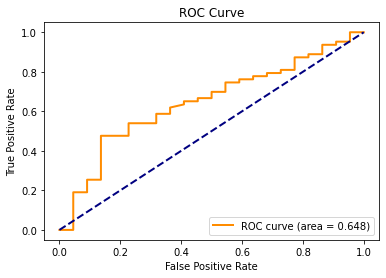

In [34]:
plot_roc(fpr, tpr, auc)

## 4. Searching for Reduced Model 2 with with Regularized Logistic Regression

Is it possible that we may be overfitting our classifier model, by using ALL of the 5 explanatory variables that we used in the full model? Is it possible that there exists a reduced logistic regression model that will yield better classifications of the observations in our test dataset?

*Now* to help us answer these questions, let's use some **regularized logistic regression models** to help us find another sensible reduced model to compare to the full model.

### 4.1. Features Matrix and Target Array of the Training Dataset and Test Dataset

First, using the same training dataset and test dataset that you created in #1.4, split each of these datasets into a features matrix and a target array. Your features matrices should be comprised of the following explanatory variables from your full model:

* age
* sex
* marital status
* the amount of cigarettes smoked on the weekends
* the amount of cigarettes smoked on the weekdays

**Don't forget to turn any categorical explanatory variables in your feature matrices into the appropriate indicator variables columns that will be used in a logistic regression model!**

In [35]:
X_train = df_train[['age', 'sex', 'marital_status', 'amt_weekends', 'amt_weekdays']]
X_train.head()

,age,sex,marital_status,amt_weekends,amt_weekdays
332,22,Male,Single,20,5
248,22,Female,Single,15,7
407,52,Male,Single,25,20
184,55,Female,Married,1,0
69,40,Female,Divorced,5,0


In [36]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_train.head()

,age,amt_weekends,amt_weekdays,sex_Male,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed
332,22,20,5,1,0,0,1,0
248,22,15,7,0,0,0,1,0
407,52,25,20,1,0,0,1,0
184,55,1,0,0,1,0,0,0
69,40,5,0,0,0,0,0,0


In [37]:
y_train = df_train['y']
y_train.head()

332    1
248    1
407    0
184    1
69     1
Name: y, dtype: int32

In [38]:
X_test = df_test[['age', 'sex', 'marital_status', 'amt_weekends', 'amt_weekdays']]
X_test.head()

,age,sex,marital_status,amt_weekends,amt_weekdays
136,44,Female,Married,20,20
269,48,Female,Divorced,40,20
300,18,Female,Single,25,25
152,24,Female,Single,8,2
23,22,Female,Single,20,20


In [39]:
X_test = pd.get_dummies(X_test, drop_first=True)
X_test.head()

,age,amt_weekends,amt_weekdays,sex_Male,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed
136,44,20,20,0,1,0,0,0
269,48,40,20,0,0,0,0,0
300,18,25,25,0,0,0,1,0
152,24,8,2,0,0,0,1,0
23,22,20,20,0,0,0,1,0


In [40]:
y_test = df_test['y']
y_test.head()

136    1
269    1
300    0
152    1
23     1
Name: y, dtype: int32

### 4.2. LASSO Logistic Regression Model with Penalty Term $\lambda=5$

#### 4.2.1. Fitting the Model
Next, use your training features matrix and target array to fit a LASSO logistic regression model using:
* the liblinear solver,
* a regularization penalty parameter of $\lambda=5$,
* and a maximum number of solver iterations of 1000.

In [41]:
lasso_mod_5 = LogisticRegression('l1', solver='liblinear', 
                          max_iter=1000, C=1/5)
lasso_mod_5.fit(X_train,y_train)

LogisticRegression(C=0.2, max_iter=1000, penalty='l1', solver='liblinear')

#### 4.2.2. Extracting the Slopes

Next, extract the slopes for this LASSO logistic regression model.

In [42]:
df_slope = pd.DataFrame(lasso_mod_5.coef_.T, columns=['lasso_5_slopes'], index=X_train.columns)
df_slope

,lasso_5_slopes
age,0.028199
amt_weekends,0.016418
amt_weekdays,-0.038604
sex_Male,-0.413925
marital_status_Married,0.000000
marital_status_Separated,0.000000
marital_status_Single,0.000000
marital_status_Widowed,0.000000


#### 4.2.3. Interpreting the Slopes

What do the results of this LASSO logistic regression model with regularization penalty $\lambda=5$ suggest?

If we were to create a reduced model based on the resulting slope values of this model, which explanatory variables should be included in the model?

The results of this LASSO logistic regression model with regularization penalty $\lambda=5$ suggest that only the age, amt_weekends, amt_weekdays, and sex explanatory variables bring enough predictive power to logistic regression model to warrant leaving them in the model (as these are the only slopes in the model that are non-zero).

If we were to use these results to create a reduced model for further testing, this would indicate that we would only want to use age, amt_Weekends, amt_weekdays, and sex as explanatory variables.

### 4.3. LASSO Logistic Regression Model with Penalty Term $\lambda=2$

#### 4.3.1. Fitting the Model

Next, use your training features matrix and target array to fit a LASSO logistic regression model using:
* the liblinear solver,
* a regularization penalty parameter of $\lambda=2$,
* and a maximum number of solver iterations of 1000.

In [43]:
lasso_mod_2 = LogisticRegression('l1', solver='liblinear', 
                          max_iter=1000, C=1/2)
lasso_mod_2.fit(X_train,y_train)

LogisticRegression(C=0.5, max_iter=1000, penalty='l1', solver='liblinear')

#### 4.3.2. Extracting the Slopes

Next, extract the slopes for this logistic regression model.

In [44]:
df_slope['lasso_2_slopes'] = lasso_mod_2.coef_.T
df_slope

,lasso_5_slopes,lasso_2_slopes
age,0.028199,0.019102
amt_weekends,0.016418,0.010160
amt_weekdays,-0.038604,-0.034143
sex_Male,-0.413925,-0.669232
marital_status_Married,0.000000,0.170803
marital_status_Separated,0.000000,0.000000
marital_status_Single,0.000000,0.000000
marital_status_Widowed,0.000000,0.074299


#### 4.3.3. Interpreting the Slopes

What do the results of this LASSO logistic regression model with regularization penalty $\lambda=2$ suggest?

If we were to create a reduced model based on the resulting slope values of this model, which explanatory variables should be included in the model?

The results of this LASSO logistic regression model with regularization penalty $\lambda=2$ suggest that all 5 explanatory variables age, amt_weekends, amt_weekdays, sex, and marital status explanatory variables bring enough predictive power to logistic regression model to warrant leaving them in the model. The age, amt_weekends, amt_weekdays, and sex_Male variables all have non-zero slopes. In addition, while some of the marital status indicator variables have zero slopes, because at least one of the indicator variables for marital status has a non-zero slope, this indicates that at least one of the levels of marital status brings enough predictive power to the model to warrant leaving the marital status explanatory variable (and all of it's 4 indicator variables) in the model.


Because of our results above, our "reduced model" would actually just be the full model which uses all 5 explanatory variables, as our LASSO results with $\lambda=2$ suggested that none of the explanatory variables should be dropped.

### 4.4. Elastic Net Logistic Regression Model with Penalty Term $\lambda=5$ and $\alpha = 0.9$

#### 4.4.1. Fitting the Model

Next, use your training features matrix and target array to fit an elastic net logistic regression model using:
* the saga solver,
* a regularization penalty parameter of $\lambda=5$,
* and a maximum number of solver iterations of 1000,
* and an $\alpha=0.9$.

In [45]:
enet_mod = LogisticRegression('elasticnet', solver='saga', 
                          max_iter=1000, C=1/5, l1_ratio=0.9)
enet_mod.fit(X_train,y_train)

C:\Users\vellison\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.2, l1_ratio=0.9, max_iter=1000, penalty='elasticnet',
                   solver='saga')

#### 4.4.2. Extracting the Slopes

Next, extract the slopes for this logistic regression model.

In [46]:
df_slope['elastic_net_slopes'] = enet_mod.coef_.T
df_slope

,lasso_5_slopes,lasso_2_slopes,elastic_net_slopes
age,0.028199,0.019102,0.019915
amt_weekends,0.016418,0.010160,0.007228
amt_weekdays,-0.038604,-0.034143,-0.034094
sex_Male,-0.413925,-0.669232,-0.456783
marital_status_Married,0.000000,0.170803,0.000000
marital_status_Separated,0.000000,0.000000,0.000000
marital_status_Single,0.000000,0.000000,0.000000
marital_status_Widowed,0.000000,0.074299,0.000000


#### 4.4.3. Interpreting the Slopes

What do the results of this elastic net logistic regression model with regularization penalty $\lambda=5$ and $\alpha=0.9$ suggest?

If we were to create a reduced model based on the resulting slope values of this model, which explanatory variables should be included in the model?

The results of this elastic net logistic regression model with regularization penalty $\lambda=5$ and $\alpha=0.9$ suggest that only the age, amt_weekends, amt_weekdays, and sex explanatory variables bring enough predictive power to logistic regression model to warrant leaving them in the model (as these are the only slopes in the model that are non-zero).

If we were to use these results to create a reduced model for further testing, this would indicate that we would only want to use age, amt_Weekends, amt_weekdays, and sex as explanatory variables.

### 4.5. Ridge Logistic Regression Model with Penalty Term $\lambda=5$

#### 4.5.1. Fitting the Model

Next, use your training features matrix and target array to fit a ridge logistic regression model using:
* the liblinear solver,
* a regularization penalty parameter of $\lambda=5$,
* and a maximum number of solver iterations of 1000.

In [47]:
r_mod = LogisticRegression('l2', solver='liblinear', 
                          max_iter=1000, C=1/5)
r_mod.fit(X_train,y_train)

LogisticRegression(C=0.2, max_iter=1000, solver='liblinear')

#### 4.5.2. Extracting the Slopes

Next, extract the slopes for this logistic regression model.

In [48]:
df_slope['ridge_reg_slopes'] = r_mod.coef_.T
df_slope

,lasso_5_slopes,lasso_2_slopes,elastic_net_slopes,ridge_reg_slopes
age,0.028199,0.019102,0.019915,0.018139
amt_weekends,0.016418,0.010160,0.007228,0.013308
amt_weekdays,-0.038604,-0.034143,-0.034094,-0.037380
sex_Male,-0.413925,-0.669232,-0.456783,-0.591127
marital_status_Married,0.000000,0.170803,0.000000,0.236380
marital_status_Separated,0.000000,0.000000,0.000000,-0.066120
marital_status_Single,0.000000,0.000000,0.000000,-0.037263
marital_status_Widowed,0.000000,0.074299,0.000000,0.268752


### 4.6. Non-Regularized Logistic Regression Model

#### 4.5.1. Fitting the Model

Next, use your training features matrix and target array to fit a non-regularized logistic regression model using:
* the newton-cg solver,
* and a maximum number of solver iterations of 1000.

In [49]:
log_reg = LogisticRegression('none', solver='newton-cg', 
                          max_iter=1000)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000, penalty='none', solver='newton-cg')

#### 4.5.2. Extracting the Slopes

Next, extract the slopes for this logistic regression model.

In [50]:
df_slope['log_reg_slopes'] = log_reg.coef_.T
df_slope

,lasso_5_slopes,lasso_2_slopes,elastic_net_slopes,ridge_reg_slopes,log_reg_slopes
age,0.028199,0.019102,0.019915,0.018139,-0.000524
amt_weekends,0.016418,0.010160,0.007228,0.013308,0.004912
amt_weekdays,-0.038604,-0.034143,-0.034094,-0.037380,-0.031127
sex_Male,-0.413925,-0.669232,-0.456783,-0.591127,-0.794481
marital_status_Married,0.000000,0.170803,0.000000,0.236380,0.293273
marital_status_Separated,0.000000,0.000000,0.000000,-0.066120,-0.251487
marital_status_Single,0.000000,0.000000,0.000000,-0.037263,-0.353866
marital_status_Widowed,0.000000,0.074299,0.000000,0.268752,0.962542


### 4.7. Comparing Ridge Logistic Regression Slopes to Non-Regularized Logistic Regression Slopes

Next, find the ratio of each ridge regression slope to it's corresponding non-regularized logistic regression slope. 
* Which slopes significantly decreased in magnitude in the logistic ridge regression model compared to the non-regularized logistic regression model?
* Which slopes significantly increased in magnitude in the logistic ridge regression model compared to the non-regularized logistic regression model?

In [51]:
df_slope['ridge_reg_slopes']/df_slope['log_reg_slopes']

age                        -34.626477
amt_weekends                 2.709391
amt_weekdays                 1.200894
sex_Male                     0.744042
marital_status_Married       0.806006
marital_status_Separated     0.262914
marital_status_Single        0.105301
marital_status_Widowed       0.279211
dtype: float64

The marital_status_Separated, marital_status_Single, and marital_status_Widowed slopes significantly decreased and the age slope significantly increased.

### 4.8. LASSO vs. Ridge Regression Interpretability

Do our LASSO logistic regression results or our ridge logistic regression results yield more straightforward suggestions about how to construct an insightful reduced model? Explain.

Our LASSO logistic regression results are much more straightforward about which explanatory variables to exclude and include in a reduced model. In the LASSO model, many of the slopes are set exactly equal to 0, suggesting that these corresponding explanatory variables do not bring enough predictive power to the model. Thus we might consider excluding these explanatory variables from a reduced model to use for further testing.

Alternatively, ridge regression models will often not set any of the slopes EXACTLY equal to 0. This makes interpretation difficult as some slopes in a logistic may be:
* set to be small because they do not bring enough preditive power to the model OR
* the relationship between this variable and the response variable may just be naturally small.

It is more difficult to determine "how small of a slope is small enough" to determine that the corresponding variable does not contribute enough predictive power to the model.

## 5. <u>Reduced Model 2</u> Testing the Reduced Model

Use your suggestions from 4.2.3 to fit one more reduced logistic regression model.

### 5.1. Fitting the Full Logistic Regression Model

Fit this reduced logistic regression model 2 **with the training dataset** and display the summary output table below.

In [52]:
red_mod2=smf.logit('y~age+sex+amt_weekends+amt_weekdays', data=df_train).fit()
red_mod2.summary()

Optimization terminated successfully.
         Current function value: 0.581044
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  336
Model:                          Logit   Df Residuals:                      331
Method:                           MLE   Df Model:                            4
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                 0.05346
Time:                        15:53:25   Log-Likelihood:                -195.23
converged:                       True   LL-Null:                       -206.26
Covariance Type:            nonrobust   LLR p-value:                 0.0001957
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8925      0.406      2.197      0.028       0.096       1.689
sex[T.Male]     -0.8261      0.253     -3.266      0.001      -1.322      -0.330
age              0.0160      0.008      1.956      0.051   -3.58e-05       0.032
amt_weekends     0.0052      0.020      0.263      0.792      -0.034       0.044
amt_weekdays    -0.0308      0.021     -1.439      0.150      -0.073       0.011
================================================================================
"""

### 5.2. Predictive Probabilities

Next, use this reduced logistic regression model 2 to calculate the predictive probabilities for the observations in the **test dataset.**

In [53]:
df_test['phat_test'] = red_mod2.predict(exog=df_test)
df_test['phat_test'].head() 

136    0.747687
269    0.778120
300    0.632229
152    0.778565
23     0.675625
Name: phat_test, dtype: float64

### 5.3. ROC and AUC

Finally, display the ROC curve and AUC score for this **full logistic regression model** and the **test dataset**.

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, score = roc_curve(y_true=df_test['y'], y_score=df_test['phat_test'])
auc = roc_auc_score(y_true=df_test['y'], y_score=df_test['phat_test'])

In [55]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

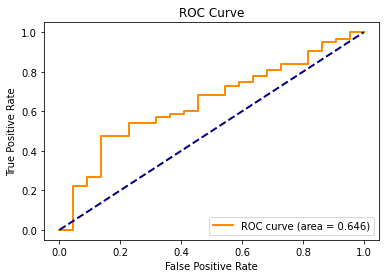

In [56]:
plot_roc(fpr, tpr, auc)

## 6. Comparing the 3 Classifier Models

Next, we would like to compare the performance of all 3 classifier models that we have selected ie.:
* the full model
* reduced model 1
* reduced model 2

### 6.1. Best Test Dataset Performance with Test Dataset

Which of these three classifier models performed the best when it came to classifying the test dataset? Explain.

It actually turns out that the full model had the best performance out of all 3 classifier models. It's AUC for the test dataset was the highest. This indicates that the full classifier model had a predictive probability threshold that got the closest to having the ideal classification scenario of a fpr = 0 and a tpr = 1.

### 6.2. Assessing General Performance

Did any of these classifier models perform exceptionally well at classifying the observations in the test dataset? Explain.

None of these classifiers performed exceptionally well in classifying the observations in the test dataset. The full model had the highest AUC of 0.657. This indicates that none of these logistic regression models had a predictive probability threshold that got anywhere close to yielding the ideal classification scenario of a fpr = 0 and a tpr =1 (which would have yielded an AUC of 1). 

Even our best logistic regression model is much closer to an AUC of 0.5, which would be the type of classifier model performance we would expect to get if we had simpy just assigned a 1 (ie. packets) classification and 0 (ie. non-packets classification) to the data in our test dataset at random.

### 6.3. Model Comparison with Hypothesis Testing

Finally, let's compare our reduced model 1 to our full model using the log likelihood ratio test.

#### 6.3.1. Hypotheses

First set up your hypotheses for this hypothesis test below.

$
\begin{align}
H_0: &\quad \mbox{Reduced Model is correct},\\
\\
H_A: &\quad \mbox{Reduced Model is incorrect because the missing 'marital_status' indicator variable coefficients as well as the amt_weekends coefficient in Reduced Model are not zero}.\\
\end{align}
$

#### 6.3.2. Test Statistic

Next, calculate the test statistic for this hypothesis test.

In [57]:
test_stat = -2*(red_mod1.llf - full_mod.llf)
test_stat

5.385803177781497

#### 6.3.3. p-value

Then, calculate the p-value for this hypothesis test.

There were 5 slopes that were deleted in going from the full model to reduced model 1 (ie. the 4 indicator variable slopes for marital status and the 1 slope for the amt_weekend variable). 

Thus, our p-value is the area under the Chi-Squared distribution with df = 5 going to the right of our test statistic.

In [58]:
from scipy.stats import chi2
pvalue = 1 - chi2.cdf(test_stat, df=5)
pvalue

0.370630499784671

#### 6.3.4. Conclusion

Use your p-value and a significance level of $\alpha = 0.05$ to evaluate your hypotheses.

Because our p-value = $0.37\geq \alpha=0.05$ we fail to reject our null hypothesis. Thus, there is not sufficient evidence to suggest that the reduced Model is incorrect because the missing 'marital_status' indicator variable coefficients as well as the amt_weekends coefficients in Reduced Model are not zero. 

### 6.4. Comparison of Results

Does your analyses in 6.1 and 6.3 agree?

No. Our ROC curves constructed for the test data indicate that the full model slightly outperformed both of the reduced models. However, our log-likelihood ratio test in 6.3 suggests that reduced model 1 is more parsimonious than the full model, and is therefore suggests is less likely to be overfitting the model and thereby get better performance for new datasets.

To further test why this disagreement might be happening, we might consider trying out different splits of the dataset into training and test data. It may be the case that our reduced models may outperform the full model for different test datasets.

## 7. Full Classifier Model Test Data Performance

Finally, let's examine our **full logistic regression classifier model** with our **training dataset**.

### 7.1. Evaluating FPR/TPR Combinations in the ROC Curve

Let's examine two predictive probability thresholds that we could use with our full model.

* One threshold creates a classification of the test data with tpr = 0.746, fpr = 0.591.
* The other threshold creates a classification of the test data with tpr = 0.492, fpr = 0.136

Suppose that we work for a public health organization in the U.K. and we are trying to target a public health awareness ad campaign specifically to people that smoke packet cigarettes. We do not know if these people smoke packets or not, but we do know their sex, age, marital status, and how many cigarettes they smoke on the weekends and weekdays.

It is very important that we direct these ads to as many packet smokers as possible. However, it is not a big deal if we direct these ads to quite a lot of non-packet smokers as well. Which of these two thresholds will better help us meet our goal?

The first threshold that produces a tpr = 0.746, fpr = 0.636 will be better. Because we want to accurately predict as many packet smokers (ie. y=1 observations) as possible, we would like for our true positive rate to be high. However, we do not care as much if we incorrectly classify a lot of non-packet smokers (ie. y=0 observations). In other words, we do not care if our false positive rate is high.

### 7.2. Predictive Probability Threshold

Find the predictive probability threshold that will yield the tpr and fpr combination for the test data that you selected above in 7.1.

In [59]:
df_test['phat_test'] = full_mod.predict(exog=df_test)
df_test['phat_test'].head() 

136    0.789812
269    0.755223
300    0.636268
152    0.766467
23     0.665562
Name: phat_test, dtype: float64

In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, score = roc_curve(y_true=df_test['y'], y_score=df_test['phat_test'])
auc = roc_auc_score(y_true=df_test['y'], y_score=df_test['phat_test'])

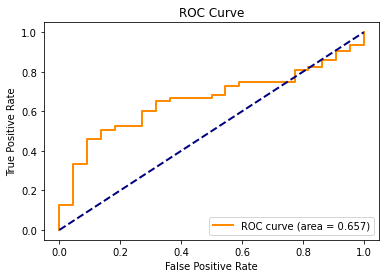

In [61]:
plot_roc(fpr, tpr, auc)

In [62]:
from sklearn.metrics import confusion_matrix

def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
                         'tpr':[tpr], 
                         'fpr':[fpr]})

In [63]:
for thresh in np.arange(0,1,.01):
    print(tpr_fpr_thresh(df_test['y'], df_test['phat_test'], thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr  fpr
0       0.01  1.0  1.0
   threshold  tpr  fpr
0       0.02  1.0  1.0
   threshold  tpr  fpr
0       0.03  1.0  1.0
   threshold  tpr  fpr
0       0.04  1.0  1.0
   threshold  tpr  fpr
0       0.05  1.0  1.0
   threshold  tpr  fpr
0       0.06  1.0  1.0
   threshold  tpr  fpr
0       0.07  1.0  1.0
   threshold  tpr  fpr
0       0.08  1.0  1.0
   threshold  tpr  fpr
0       0.09  1.0  1.0
   threshold  tpr  fpr
0        0.1  1.0  1.0
   threshold  tpr  fpr
0       0.11  1.0  1.0
   threshold  tpr  fpr
0       0.12  1.0  1.0
   threshold  tpr  fpr
0       0.13  1.0  1.0
   threshold  tpr  fpr
0       0.14  1.0  1.0
   threshold  tpr  fpr
0       0.15  1.0  1.0
   threshold  tpr  fpr
0       0.16  1.0  1.0
   threshold  tpr  fpr
0       0.17  1.0  1.0
   threshold  tpr  fpr
0       0.18  1.0  1.0
   threshold  tpr  fpr
0       0.19  1.0  1.0
   threshold  tpr  fpr
0        0.2  1.0  1.0
   threshold  tpr  fpr
0       0.2

A predictive probability threshold of $p_0=0.65$ will yield a test data tpr=0.746032 and fpr = 0.590909.

### 7.3 Confusion Matrix

Use this threshold to calculate a confusion matrix for the test dataset.
* How many packet smokers in the test dataset were correctly classified as packet smokers?
* How many packet smokers in the test dataset were incorrectly classified as non-packet smokers?
* How many non-packet smokers in the test dataset were correctly classified as non-packet smokers?
* How many non-packet smokers in the test dataset were incorrectly classified as packet smokers?

In [64]:
df_test['yhat'] = 1*(df_test['phat_test'] >= 0.65)
df_test.head()

,sex,age,marital_status,highest_qualification,nationality,gross_income,region,smoke,amt_weekends,amt_weekdays,type,y,phat_test,yhat
136,Female,44,Married,No Qualification,English,"10,400 to 15,600",Midlands & East Anglia,Yes,20,20,Packets,1,0.789812,1
269,Female,48,Divorced,No Qualification,Irish,"2,600 to 5,200",South East,Yes,40,20,Packets,1,0.755223,1
300,Female,18,Single,GCSE/O Level,English,"2,600 to 5,200",South East,Yes,25,25,Both/Mainly Hand-Rolled,0,0.636268,0
152,Female,24,Single,GCSE/CSE,British,"10,400 to 15,600",Midlands & East Anglia,Yes,8,2,Packets,1,0.766467,1
23,Female,22,Single,GCSE/CSE,English,"2,600 to 5,200",The North,Yes,20,20,Packets,1,0.665562,1


In [65]:
tn, fp, fn, tp = confusion_matrix(y_true=df_test['y'], y_pred=df_test['yhat']).ravel()
print(tn, fp, fn, tp)

9 13 16 47


* 47 packet smokers in the test dataset were correctly classified as packet smokers
* 16 packet smokers in the test dataset were incorrectly classified as non-packet smokers
* 9 non-packet smokers in the test dataset were correctly classified as non-packet smokers
* 13 non-packet smokers in the test dataset were incorrectly classified as packet smokers

### 7.4. Sensitivity and Specificity

Calculate the sensitivity and specificity of your test dataset observations with this full model logistic regression classifier and the threshold that you chose.

In [66]:
sensitivity = tp/(tp+fn)
sensitivity

0.746031746031746

In [67]:
specificity = tn/(tn+fp)
specificity

0.4090909090909091

## 8. Full Logistic Regression Model Equation and Prediction


### 8.1 Logistic Regression Equation
Next, write out the full logistic regression model equation (found with your **training dataset**). Make sure to use the right notation.

In [68]:
full_mod=smf.logit('y~age+sex+marital_status+amt_weekends+amt_weekdays', data=df_train).fit()
full_mod.summary()

Optimization terminated successfully.
         Current function value: 0.573133
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  336
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            8
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                 0.06635
Time:                        15:53:27   Log-Likelihood:                -192.57
converged:                       True   LL-Null:                       -206.26
Covariance Type:            nonrobust   LLR p-value:                 0.0006105
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.5779      0.649      2.431      0.015       0.306       2.850
sex[T.Male]                    -0.7945      0.260     -3.050      0.002      -1.305      -0.284
marital_status[T.Married]       0.2933      0.410      0.716      0.474      -0.510       1.097
marital_status[T.Separated]    -0.2515      0.589     -0.427      0.670      -1.407       0.904
marital_status[T.Single]       -0.3539      0.432     -0.819      0.413      -1.201       0.493
marital_status[T.Widowed]       0.9625      0.657      1.464      0.143      -0.326       2.251
age                            -0.0005      0.011     -0.046      0.963      -0.023       0.022
amt_weekends                    0.0049      0.020      0.245      0.806      -0.034       0.044
amt_weekdays                   -0.0311      0.022     -1.435      0.151      -0.074       0.011
===============================================================================================
"""

$\log(\frac{\hat{p}}{(1-\hat{p})}) = 1.5779	-0.7945sex[T.Male]+0.2933marital\_status[T.Married]-0.2515marital\_status[T.Separated]	-0.3539marital\_status[T.Single]+0.9625marital\_status[T.Widowed]	-0.0005age+0.0049amt\_weekends-0.0311amt\_weekdays$

### 8.2. Probability Prediction

What is the predictive probability that a 20-year-old, single, female, that smokes 1 cigarette on the weekends and 1 cigarette on the weekdays smokes packets?

In [69]:
prob=full_mod.predict(exog=dict(sex='Female',age=20, marital_status='Single', amt_weekends=1, amt_weekdays=1)).iloc[0]
prob

0.7662593188037505

### 8.3. Classification

Would we classify this person from 8.2. as a packet smoker or non-packet smoker using the threshold that we selected?

This person's predictive probability is above the threshold of $p_0=0.65$, thus we would classify this person as a packet smoker (ie. y=1).

### 8.4. Odds Prediction

What are the odds that this person from 8.2. is a packet smoker? Put these odds into words.

In [70]:
odds = prob/(1-prob)
odds

3.2782454251529995

The numerical odds that this person is a packet smoker is 3.28 (ie. 3.28/1)

Putting this into words, we could say that the odds that this person is a packet smoker are 3.28 to 1. Putting these numbers into an integer format we can multiply the 3.28 and the 1 by 100.

So more succintly, we can say that the odds that this person is a packet smoker are 328 to 100.



### 8.5. Interpretations

#### 8.5.1. Baseline Odds

What is the baseline odds of this logistic regression equation. Put this baseline odds into words.


In [71]:
np.exp(1.5779)

4.844771101721707

We would expect the odds of a divorced female that is 0 years old that smokes 0 cigarettes on the weekends and 0 cigarettes on the weekdays being a packet smoker to be 4.84, on average.

#### 8.5.2 Odds Multiplier for Amount Smoked on the Weekend

What is the odds multiplier for the amount of cigarettes smoked on the weekend for this model? Put this odds multiplier into words.

In [72]:
np.exp(0.0049)

1.0049120246322103

All else held equal, if we were to increase the number of cigarettes that a UK smoker smokes on the weekends by 1 cigarette, then we would expect the odds that this person is a packet smoker to increase by a multiple of 1.0049, on average.

#### 8.5.3. Odds Ratio

All else held equal, what would we expect the ratio of the odds that a male UK smoker smokes packets over the odds that a female smoker smokes packets to be, on average?

In [73]:
np.exp(-0.7945)

0.451807081997117

We would expect $\frac{odds_{male}}{odds_{female}}=0.452$, on average, all else held equal.

## 9. Full Logistic Regression Model Inference

### 9.1 90% Confidence for the Odds Multiplier

Create a 90% confidence interval for the population **odds multiplier** for amt_weekends in the corresponding population logistic regression model.

In order to create a 90% confidence interval for $e^{\beta_7}$ (ie. the odds multiplier for amt_weekends in the population model), we need to create a 90% confidence interval for $\beta_7$ (ie. the slope for amt_weekends in the population model).

In [74]:
point_estimate = 0.0049
standard_error = 0.020

critical_value =norm.ppf(0.95)

critical_value

1.6448536269514722

In [75]:
lower_bound = point_estimate - critical_value * standard_error
upper_bound = point_estimate + critical_value * standard_error

print(lower_bound, upper_bound)

-0.027997072539029444 0.03779707253902945


So the 90% confidence interval for $\beta_7$ is above. In order to get the 90% confidence interval for $e^{\beta_7}$, all we need to do is exponentiate both bounds of the confidence interval for $\beta_7$.

In [76]:
lower_odds_mult_bound =np.exp(lower_bound)
upper_odds_mult_bound =np.exp(upper_bound)

print(lower_odds_mult_bound, upper_odds_mult_bound)

0.9723912134344056 1.038520467172577


### 9.2. Interpretation of 90% Confidence Interval

Put this confidence interval into words.

We are 90% confident that the odds multiplier for amt_weekends in the corresponding population model is between 0.972 and 1.039.

### 9.3 Hypothesis Testing

We would like to determine if we have sufficient evidence to suggest that the odds multiplier for amt_weekends variable in the population logistic regression model is not equal to 1 by hand.

This is equivalent to assessing whether there is a relationship between the amount of cigarettes smoked on the weekend by all UK smokers and whether or not the person smokes packets.

#### 9.3.1. Hypotheses

Set up the hypothesis for this test. Make sure you define any parameters that you use.

Because $\beta_7$ represents the population slope for amt_weekends, $e^{\beta_7}$ is the odds multiplier for the amt_weekends variable in the population logistic regression model.

$H_0: e^{\beta_7}=1$

$H_A: e^{\beta_7} \neq 1$

is equivalent to

$H_0: \beta_7=0$

$H_A: \beta_7 \neq 0$

#### 9.3.2. Test statistic

Calculate the test statistic for this test by hand.

In [77]:
point_estimate = 0.0049
standard_error = 0.020
null_value=0

test_stat=(point_estimate-null_value)/standard_error
print("Test Statistic",test_stat)

Test Statistic 0.245


#### 9.3.3. p-value

Calculate the p-value for this test by hand.

In [78]:
p_value=2*(1-norm.cdf(np.abs(test_stat)))
print('pvalue', p_value)

pvalue 0.8064564313589513


#### 9.3.4. Conclusion with p-value

Evaluate these hypotheses using your p-value and a significance level of $\alpha=0.05$.

Because the $p-value = 0.806 \geq \alpha=0.05$ we fail to reject the null hypothesis. Thus there is not sufficient evidence to suggest $e^{\beta_7}$ (the odds multiplier for amt_weekend in the population model) is not equal to 1.

(Or in other words, there is not sufficient evidence to suggest that there is a relationship between smoking packets and the amount of cigarettes smoked on the weekend for all UK smokers in this corresponding population model).

#### 9.3.5. Conclusion with confidence interval

Evaluate these hypotheses using your confidence intervalfor the **odds multiplier** that you found in 9.1.

Because the null value $e^{\beta_7}=1$ is inside the confidence interval, we fail to reject the null hypothesis. Thus there is not sufficient evidence to suggest $e^{\beta_7}$ (the odds multiplier for amt_weekend in the population model) is not equal to 1.

(Or in other words, there is not sufficient evidence to suggest that there is a relationship between smoking packets and the amount of cigarettes smoked on the weekend for all UK smokers in this corresponding population model).

## 10. Descriptive Analytics

### 10.1. Packet Smokers Status and Sex

Visualize the relationship between sex and whether or not someone smokes packets in the full dataset. Is there a relationship between sex and packet smoker status in this dataset?

In [79]:
tmp = pd.crosstab(df['sex'], df['y'], normalize='index')
tmp

y,0,1
sex,,
Female,0.205128,0.794872
Male,0.406417,0.593583


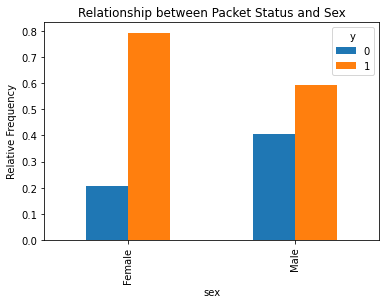

In [80]:
tmp.plot.bar()
plt.title('Relationship between Packet Status and Sex')
plt.ylabel('Relative Frequency')
plt.show()

There is an association between sex and packet smoker status. For instance, female smokers are much more likely to be packet smokers (79.48%) than male smokers (59.36%).

### 10.2. Packet Smoker Status and Age

Visualize the relationship between packet smoker status and age for the full dataset. 

Is there a strong association between packet smoker status and age for this full dataset?

Compare the two distributions of ages for packet smokers and non-smokers (**be thorough**).

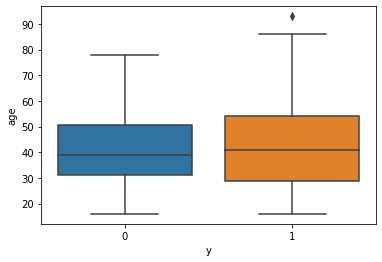

In [81]:
sns.boxplot(x='y', y='age', data=df)
plt.show()

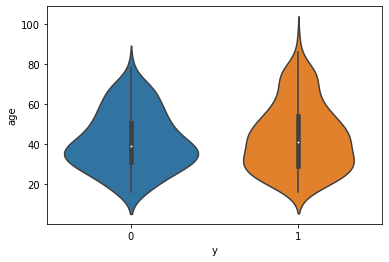

In [82]:
sns.violinplot(x='y', y='age', data=df)
plt.show()

In [83]:
df[['y','age']].groupby(['y']).median()

,age
y,
0,39.0
1,41.0


In [84]:
df[['y','age']].groupby(['y']).quantile(0.75)-df[['y','age']].groupby(['y']).quantile(0.25)

,age
y,
0,19.5
1,25.0


There is not a strong association between age and packet smoker status. The median age of packet and non-packet smokers are very close with respect the IQR. The IQRs of the two age distributions have a strong overlap.

1. The median age of packet smokers is 41 and the median age of non-packet smokers is 39.
2. The IQR age of packet smokers is 25 and the IQR age of non-packet smokers is 19.5.
3. The age distributions of both packet and non-packet smokers are roughly unimodal and right-skewed.
4. Packet smokers have a high age outlier.

### 10.3. Packet Smoker Status,  Age, and Sex

Visualize the relationship between packet smoker status, age, and sex for the full dataset. 

Compare the association between age and smoker status (for both sexes). Is the relationship between age and smoker status stronger for a certain sex?

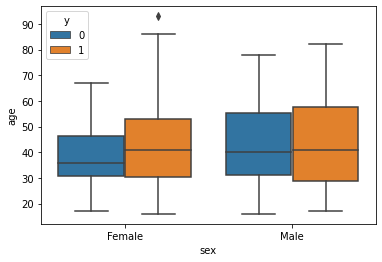

In [85]:
sns.boxplot(x='sex', y='age', hue='y', data=df)
plt.show()

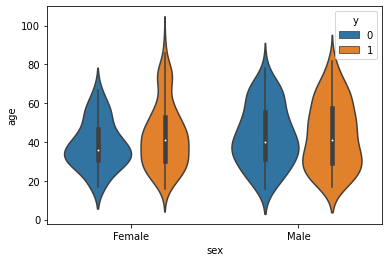

In [86]:
sns.violinplot(x='sex', y='age', hue='y', data=df)
plt.show()

Because the difference in the median age of packet and non-packet smokers for **females smokers** is much larger than the difference in the median age of packet and non-packet smoker for **male smokers**, we can say that the association between age and packet status is stronger for female smokers.

### 10.4 Packet Smoker Status and Amount Smoked on the Weekdays and Weekends

#### 10.4.1 Visualization
In a single plot visualize the relationship between:
* the amount smoked on the weekdays
* the amount smoked on the weekends
* packet smoker status

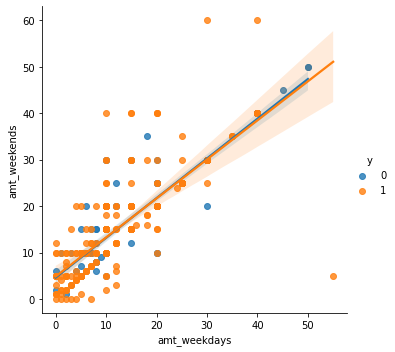

In [87]:
sns.lmplot(x='amt_weekdays', y='amt_weekends', hue='y', data=df)
plt.show()

#### 10.4.2. Comparing Relationships

Compare the relationship between the amount smoked on the weekends vs. weekdays (for packet and non-packet smokers). **Be thorough in describing these two relationships**.



1. The relationship between amt_weekdays and amt_weekends is linear for both packet and non-packet smokers.
2. The relationship between amt_weekdays and amt_weekends is positive for both packet and non-packet smokers.
3. The linear relationship between amt_weekdays and amt_weekends is strong for both packet and non-packet smokers. However, the relationship is stronger for non-packet smokers (R=0.876) than for packet smokers (R=0.766).
4. Packet smokers seems to have more outliers in the relationship between amt_weekdays and amt_weekends than non-packet smokers.
5. The slopes (0.8403 vs. 0.8545) and intercepts (4.8566 vs. 4.6327) of the linear regression lines are relatively similar for both packet and non-packet smokers.

In [88]:
df[['amt_weekdays', 'amt_weekends','y']].groupby(['y']).corr()

amt_weekdays  amt_weekends
y                                         
0 amt_weekdays      1.000000      0.876356
  amt_weekends      0.876356      1.000000
1 amt_weekdays      1.000000      0.765602
  amt_weekends      0.765602      1.000000

In [89]:
packet_lin = smf.ols('amt_weekends~amt_weekdays', data=df[df['y']==1]).fit()
packet_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           amt_weekends   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     417.8
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           1.85e-58
Time:                        15:53:32   Log-Likelihood:                -969.15
No. Observations:                 297   AIC:                             1942.
Df Residuals:                     295   BIC:                             1950.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.8566      0.649      7.484      0.000       3.579       6.134
amt_weekdays     0.8403      0.041     20.440      0.000       0.759       0.921
==============================================================================
Omnibus:                       75.274   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1959.249
Skew:                           0.222   Prob(JB):                         0.00
Kurtosis:                      15.575   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
packet_lin = smf.ols('amt_weekends~amt_weekdays', data=df[df['y']==0]).fit()
packet_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           amt_weekends   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     403.9
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           1.62e-40
Time:                        15:53:32   Log-Likelihood:                -368.93
No. Observations:                 124   AIC:                             741.9
Df Residuals:                     122   BIC:                             747.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.6327      0.788      5.877      0.000       3.072       6.193
amt_weekdays     0.8545      0.043     20.096      0.000       0.770       0.939
==============================================================================
Omnibus:                       33.694   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.260
Skew:                           1.154   Prob(JB):                     4.09e-15
Kurtosis:                       5.739   Cond. No.                         34.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""